<a href="https://colab.research.google.com/github/UmaGhildiyal/Deep_Neural_Networks_YT/blob/main/14_data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1 align="center">Data Augmentation To Address Overfitting In Flower Classification CNN</h1>**


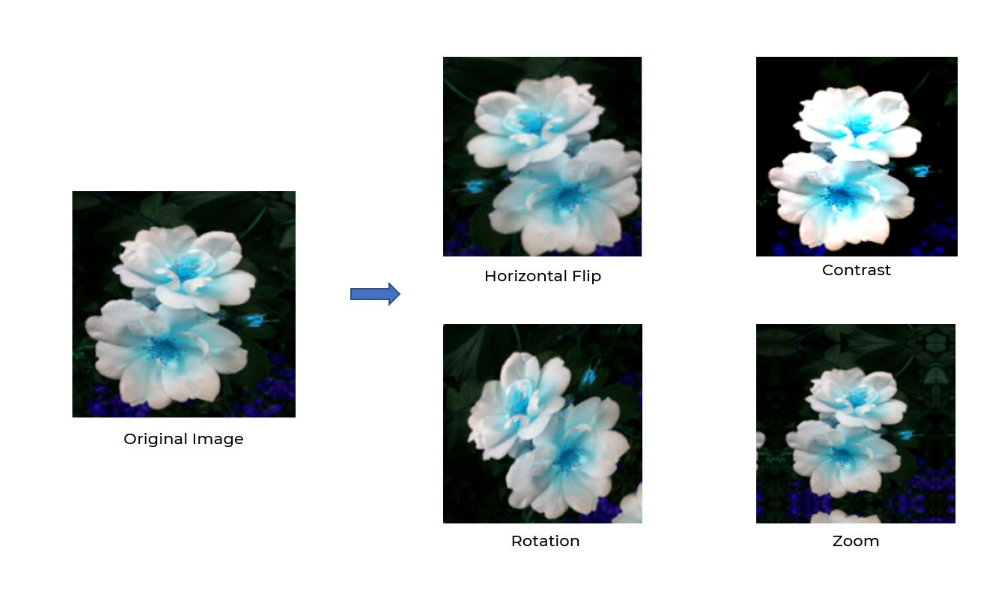

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Loading Flower Dataset

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

# cache_dir indicates where to download data ---> . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 3s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [6]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6570546331_ffb9dab0bf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/17302463621_d82be11f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/22385375599_1faf334f5d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/16666836810_216f50e9c3_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4809566219_88f9a1aea3.jpg')]

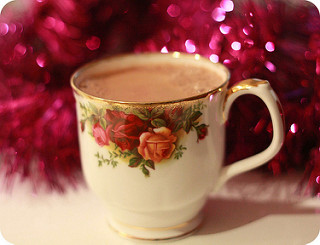

In [7]:
PIL.Image.open(str(roses[0]))

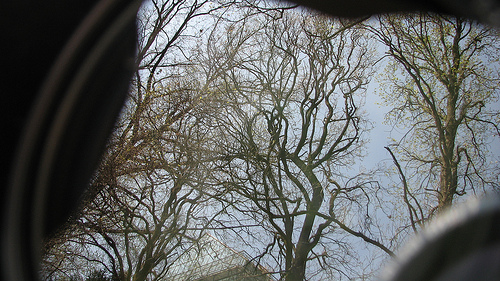

In [8]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [9]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [10]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

array([[[255, 255, 254],
        [255, 254, 255],
        [251, 250, 255],
        ...,
        [254, 248, 255],
        [253, 254, 255],
        [250, 255, 237]],

       [[253, 255, 247],
        [255, 255, 255],
        [255, 252, 255],
        ...,
        [252, 254, 248],
        [255, 255, 254],
        [251, 251, 255]],

       [[251, 255, 246],
        [255, 255, 254],
        [255, 250, 255],
        ...,
        [255, 255, 244],
        [249, 250, 246],
        [255, 248, 255]],

       ...,

       [[255, 254, 255],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [253, 255, 252],
        [255, 255, 252],
        [255, 253, 252]],

       [[254, 253, 255],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [254, 255, 251],
        [253, 254, 252],
        [254, 254, 254]],

       [[254, 253, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 251, 253],
        [255, 254, 255],
        [253, 254, 255]]], dtype=uint8)
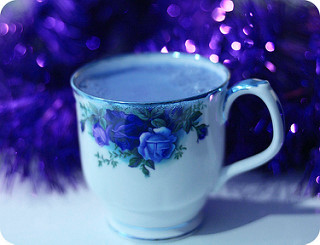

In [11]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img
# str --->live path to regular string

In [45]:
# images are of diff dimentions
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [46]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  # print(flower_name)
  # print(len(images))

  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))

    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [14]:
y[639:645]

[0, 0, 1, 1, 1, 1]

array([[[255, 255, 253],
        [252, 251, 255],
        [251, 252, 249],
        ...,
        [255, 254, 250],
        [253, 249, 253],
        [251, 254, 246]],

       [[253, 255, 249],
        [255, 250, 255],
        [254, 252, 255],
        ...,
        [254, 252, 255],
        [253, 254, 246],
        [253, 250, 253]],

       [[255, 254, 254],
        [255, 254, 254],
        [248, 248, 248],
        ...,
        [255, 254, 254],
        [252, 251, 247],
        [255, 252, 254]],

       ...,

       [[255, 254, 255],
        [255, 254, 253],
        [251, 253, 253],
        ...,
        [252, 252, 251],
        [249, 254, 251],
        [254, 254, 254]],

       [[255, 254, 255],
        [255, 255, 254],
        [254, 254, 252],
        ...,
        [254, 254, 250],
        [254, 255, 251],
        [254, 254, 252]],

       [[254, 254, 255],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [255, 255, 254],
        [254, 252, 253],
        [254, 254, 254]]], dtype=uint8)
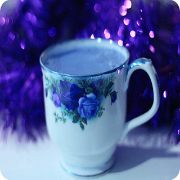

In [15]:
X[0]

In [16]:
X = np.array(X)
y = np.array(y)

# Train-Test Split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

In [18]:
len(X_train)

2752

In [19]:
len(X_test)

918

# Scaling Images

In [20]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

# Build CNN model

In [21]:
# 5 types of flowers
num_classes = 5

model = Sequential([
    # cnn
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes),
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 8s 22ms/step - loss: 1.5127 - accuracy: 0.3387
Epoch 2/30
86/86 [==============================] - 2s 21ms/step - loss: 1.0960 - accuracy: 0.5436
Epoch 3/30
86/86 [==============================] - 2s 21ms/step - loss: 0.9116 - accuracy: 0.6468
Epoch 4/30
86/86 [==============================] - 2s 21ms/step - loss: 0.7500 - accuracy: 0.7133
Epoch 5/30
86/86 [==============================] - 2s 25ms/step - loss: 0.5504 - accuracy: 0.7994
Epoch 6/30
86/86 [==============================] - 2s 22ms/step - loss: 0.3755 - accuracy: 0.8641
Epoch 7/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1928 - accuracy: 0.9430
Epoch 8/30
86/86 [==============================] - 2s 21ms/step - loss: 0.1060 - accuracy: 0.9680
Epoch 9/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0728 - accuracy: 0.9807
Epoch 10/30
86/86 [==============================] - 2s 21ms/step - loss: 0.0669 - accuracy: 0.9836
Epoch 11/

In [22]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 18ms/step - loss: 2.8902 - accuracy: 0.6264


[2.8902361392974854, 0.6263616681098938]

case of overfitting^^

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 1s 14ms/step


array([[ -1.5501999 ,   5.444584  ,   8.697376  ,   3.2261257 ,
         -3.1575503 ],
       [ -1.0456672 ,   5.9039445 ,   4.105631  ,   0.5888235 ,
         -3.070869  ],
       [ 13.7195    ,  -2.3578222 ,   0.22412586,  -6.2425733 ,
          3.4827404 ],
       ...,
       [-15.527638  ,   0.07097619,   3.903992  ,   8.782042  ,
          2.0609198 ],
       [ 23.149542  ,  -7.0281053 ,  -6.3666277 ,   2.5509062 ,
         29.25917   ],
       [ -0.83938444,  -2.014498  ,   7.147871  ,  10.904641  ,
          1.4756817 ]], dtype=float32)

In [24]:
score= tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.3984874e-05, 3.7075028e-02, 9.5885128e-01, 4.0328987e-03,
       6.8111717e-06], dtype=float32)>

In [25]:
np.argmax(score)

2

In [26]:
y_test[0]

1

# Data Augmentation

In [47]:
# Define the image height and width
img_height = 180
img_width = 180

In [48]:
data_augmentation = keras.Sequential([
    # layers.experimental.preprocessing.RandomZoom(0.9),
    # layers.experimental.preprocessing.RandomContrast(0.8),
    # layers.experimental.preprocessing.RandomRotation(0.8),

    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
])

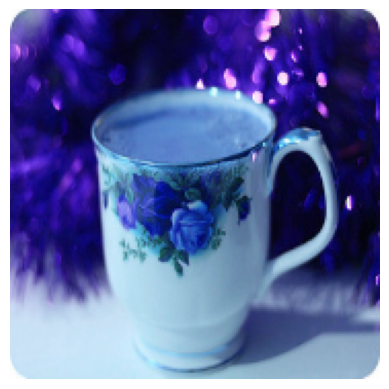

In [35]:
plt.axis('off')
plt.imshow(X[0])

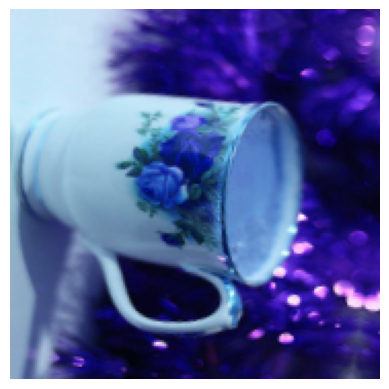

In [42]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer


In [49]:
num_classes = 5

model = Sequential([
    # cnn
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),

    # Dense
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 7s 31ms/step - loss: 1.3238 - accuracy: 0.4342
Epoch 2/30
86/86 [==============================] - 2s 29ms/step - loss: 1.0598 - accuracy: 0.5825
Epoch 3/30
86/86 [==============================] - 2s 29ms/step - loss: 0.9690 - accuracy: 0.6199
Epoch 4/30
86/86 [==============================] - 2s 29ms/step - loss: 0.9014 - accuracy: 0.6533
Epoch 5/30
86/86 [==============================] - 3s 30ms/step - loss: 0.8574 - accuracy: 0.6646
Epoch 6/30
86/86 [==============================] - 3s 29ms/step - loss: 0.8119 - accuracy: 0.6850
Epoch 7/30
86/86 [==============================] - 2s 29ms/step - loss: 0.7766 - accuracy: 0.6930
Epoch 8/30
86/86 [==============================] - 2s 29ms/step - loss: 0.7473 - accuracy: 0.7093
Epoch 9/30
86/86 [==============================] - 2s 28ms/step - loss: 0.7002 - accuracy: 0.7297
Epoch 10/30
86/86 [==============================] - 3s 31ms/step - loss: 0.6654 - accuracy: 0.7464
Epoch 11/

In [50]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 1s 12ms/step - loss: 0.8489 - accuracy: 0.7560


[0.8489266633987427, 0.7559912800788879]